https://csr.lanl.gov/data/2017.html


https://csr.lanl.gov/data-fence/1571548765/1fcFh-bNWqPJuUSQe72Z9N_Nw28=/unified-host-network-dataset-2017/netflow.html

Compressed, netflow_day-02.bz2 is 1100MB

Extracts to 6.7GB; that's 115,949,436 lines

In [60]:
import pandas
print('pandas',pandas.__version__)
import networkx
print('networkx',networkx.__version__)
from networkx import nx
from matplotlib import pyplot as plt
import time
import pickle

pandas 0.23.4
networkx 2.2


# Load data

* Time: The start time of the event in epoch time format
* Duration: The duration of the event in seconds.
* SrcDevice: The device that likely initiated the event.
* DstDevice: The receiving device.
* Protocol: The protocol number.
* SrcPort: The port used by the SrcDevice.
* DstPort: The port used by the DstDevice.
* SrcPackets: The number of packets the SrcDevice sent during the event.
* DstPackets: The number of packets the DstDevice sent during the event.
* SrcBytes: The number of bytes the SrcDevice sent during the event.
* DstBytes: The number of bytes the DstDevice sent during the event.

In [33]:
start_time = time.time()
nfdf = pandas.read_csv('netflow_day-02',
                       nrows=1000000, # 6 seconds
                       names=['Time','Duration','SrcDevice','DstDevice','Protocol','SrcPort','DstPort','SrcPackets','DstPackets','SrcBytes','DstBytes'])
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 5.83 seconds


In [61]:
nfdf.to_pickle("netflow_day_02_1E6rows.pkl")

# Exploration, Characterization

In [34]:
nfdf.shape

(1000000, 11)

In [35]:
nfdf.head()

,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [36]:
nfdf['SrcDevice'].value_counts().head(10)

Comp107130             44507
Comp370444             16763
Comp469322             15717
Comp073202             11578
Comp955278             10885
Comp410198              9754
Comp916004              5761
Comp623258              5046
EnterpriseAppServer     4884
Comp793382              4533
Name: SrcDevice, dtype: int64

In [37]:
nfdf['DstDevice'].value_counts().head(10)

Comp141988             109410
Comp186884              76019
Comp536273              73473
Comp829338              56560
Comp364152              51054
Comp857132              36476
Comp211700              36009
EnterpriseAppServer     33298
Comp275646              29403
Comp370444              28410
Name: DstDevice, dtype: int64

In [38]:
nfdf['Protocol'].value_counts()

17    426786
6     401309
1     171905
Name: Protocol, dtype: int64

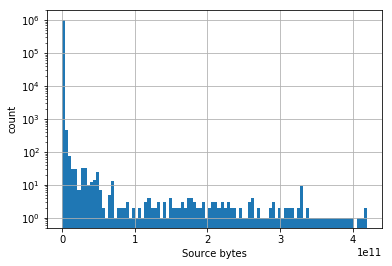

In [40]:
nfdf['SrcBytes'].hist(bins=100)
plt.gca().set_yscale('log')
plt.xlabel('Source bytes')
_=plt.ylabel('count')

# visualize using Networkx

https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html#networkx.convert_matrix.from_pandas_edgelist

In [41]:
try:
    G.clear()
except NameError:
    pass

In [42]:
G = nx.from_pandas_edgelist(nfdf[0:1000],'SrcDevice','DstDevice','Duration')

In [43]:
G.number_of_nodes()

229

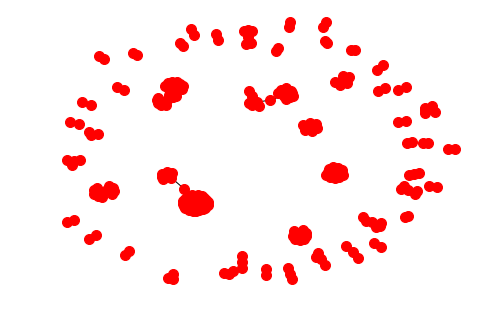

In [44]:
nx.draw(G, with_labels = False, node_size = 100)
plt.show()

In [45]:
G.remove_nodes_from(list(nx.isolates(G)))
G.number_of_nodes()
# there are no isolated nodes because the dataframe is based on src and dest

229

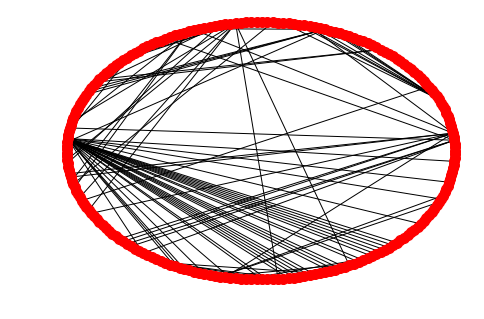

In [46]:
nx.draw(G, with_labels=False,node_size=100,pos = nx.circular_layout(G))
plt.show()

https://stackoverflow.com/questions/25222322/networkx-create-new-graph-of-all-nodes-that-are-a-part-of-4-node-clique

In [54]:
G=nx.from_pandas_edgelist(nfdf[0:100000],'SrcDevice','DstDevice','Duration')

In [55]:
cliques = nx.find_cliques(G)
cliques4 = [clq for clq in cliques if len(clq) >= 4]

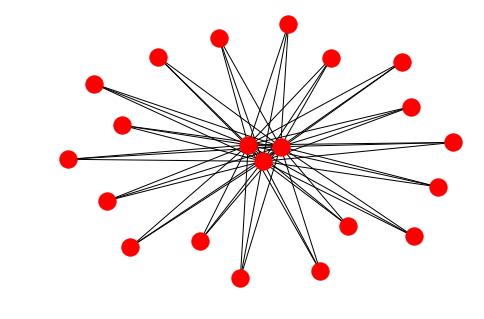

In [56]:
#Create a subgraph of g from all sufficiently large cliques:
nodes = set(n for clq in cliques4 for n in clq)
h = G.subgraph(nodes)
nx.draw(h)

In [57]:
#Drop nodes of h which have degree less than 4:
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 4]

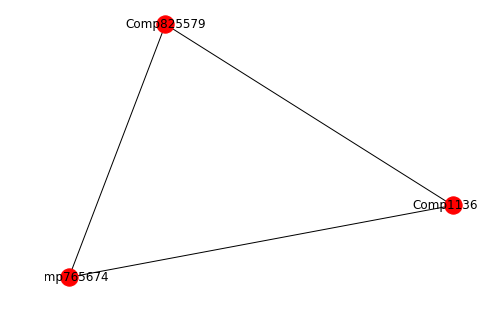

In [58]:
#The desired graph k is the subgraph of h with these nodes:
k = h.subgraph(nodes)
#Here's an image of the desired graph:
nx.draw(k,with_labels=True)

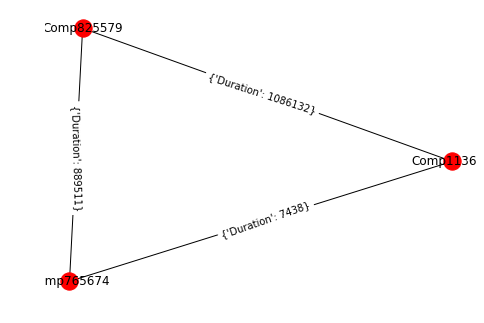

In [59]:
pos = nx.spring_layout(k)
nx.draw(k,with_labels=True)
nx.draw_networkx_edge_labels(k,pos=pos,with_labels=True)
_=plt.axis('off')